# What is Pandas?

There are a couple ways of looking at what the large, and widely-used Pandas library is.  

From an infrastructure and tool creation point-of-view, Pandas is a layer on top of NumPy that add the crucial concept of "labeled data."  We have some of that with record arrays in NumPy, but Pandas goes much further in that direction.  As well as providing friendlier and more powerful ways of selecting data, Pandas adds a large number of additional functions and methods for various kinds of computations processing data.

Remember the picture we showed when introducing NumPy of the PyData ecosystem.

![NumPy ecosystem](img/numpy-ecosystem.png)

![Pandas logo](img/pandas.svg)

Another way of looking at Pandas is in terms of the workflows it typically enables.  Pandas comes with many functions to read different data sources, as well as hooks for visualization of data and presenting aggregate results.  Many data scientists, in particular, spend almost all their work during a day reading, processing, and utilizing Pandas DataFrames.  For a certain kind of expert, nearly every task in their daily work is done within Pandas.

<img src='img/data.pandas.profit.png' width='75%'>

In [1]:
%matplotlib inline
import pandas as pd
from src.training import *

## Working With Data, Pandas Style

The next cells will probably not all make sense at first glance. They utilize a lot of new concepts and APIs related to Pandas that you have not yet been taught.  However, it is useful as an immersion just to see a representation of Pandas capabilities. Later modules will return to each of these areas in much more detail.

### Reading data

Here we will do a number of operations with the same Wisconsin Breast Cancer dataset that was used in exercises for the Advanced NumPy module.  If you did not happen to go through that module, this is a widely used example data set for machine learning and other purposes.  It contains observations of a number of biopsied tumors, some benign, some malignant, with numerous features measured on each one.

In [2]:
# Note that we very often call the "current DataFrame" simply `df`
cancer = pd.read_csv('data/wisconsin.csv')                     
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign?
0,17.99,10.38,122.80,1001.0,0.11840,...,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,...,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,...,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,...,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,...,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,...,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,...,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,...,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,...,0.9387,0.2650,0.4087,0.12400,0


### Summary statistics

We can get a quick picture of the data with some general DataFrame methods.

In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign?
count,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,...,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,...,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,...,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,...,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,...,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,...,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,...,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area']].skew()

mean radius       0.942380
mean texture      0.650450
mean perimeter    0.990650
mean area         1.645732
dtype: float64

### Selections

One limitation of Pandas DataFrame versus NumPy arrays is that DataFrames are inherently 2-D.  A Pandas capability called "hierarchical indexing" is discussed in later lessons, and provides a way to simulate dimensionality.  But mostly, think of Pandas as giving you 2-D tables.

Within the 2-D of DataFrames, however, selection of particular data is generally more intuitive and obvious than the equivalent action on a NumPy array.

In [6]:
cancer.loc[cancer['benign?'] == 1, 'worst radius':'worst area']

,worst radius,worst texture,worst perimeter,worst area
19,15.110,19.26,99.70,711.2
20,14.500,20.49,96.09,630.5
21,10.230,15.66,65.13,314.9
37,13.300,22.81,84.46,545.9
46,8.964,21.96,57.26,242.2
...,...,...,...,...
558,15.480,27.27,105.90,733.5
559,12.480,37.16,82.28,474.2
560,15.300,33.17,100.20,706.7
561,11.920,38.30,75.19,439.6


In [8]:
cancer.loc[cancer['benign?'] == 1, ['worst area', 'worst radius', 'worst texture']]

,worst area,worst radius,worst texture
19,711.2,15.110,19.26
20,630.5,14.500,20.49
21,314.9,10.230,15.66
37,545.9,13.300,22.81
46,242.2,8.964,21.96
...,...,...,...
558,733.5,15.480,27.27
559,474.2,12.480,37.16
560,706.7,15.300,33.17
561,439.6,11.920,38.30


### Grouping data

Pandas gives us SQL-like ability to group related data for aggregations

In [9]:
cancer.groupby('benign?').mean().T  # Transpose is more readable

benign?,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
...,...,...
worst compactness,0.374824,0.182673
worst concavity,0.450606,0.166238
worst concave points,0.182237,0.074444
worst symmetry,0.323468,0.270246


In [10]:
def spread(s):
    return s.max() - s.min()

cancer.groupby('benign?').agg(['mean', 'std', spread])

mean radius                   mean texture            ...  \
               mean       std  spread         mean       std  ...   
benign?                                                       ...   
0         17.462830  3.203971  17.160    21.604906  3.779470  ...   
1         12.146524  1.780512  10.869    17.914762  3.995125  ...   

        worst symmetry         worst fractal dimension                     
                   std  spread                    mean       std   spread  
benign?                                                                    
0             0.074685  0.5073                0.091530  0.021553  0.15246  
1             0.041745  0.2662                0.079442  0.013804  0.09339  

[2 rows x 90 columns]

### Plotting

Pandas DataFrames have a method `.plot()` (and a few others) that will call out to Matplotlib to create graphs of data within the DataFrames.

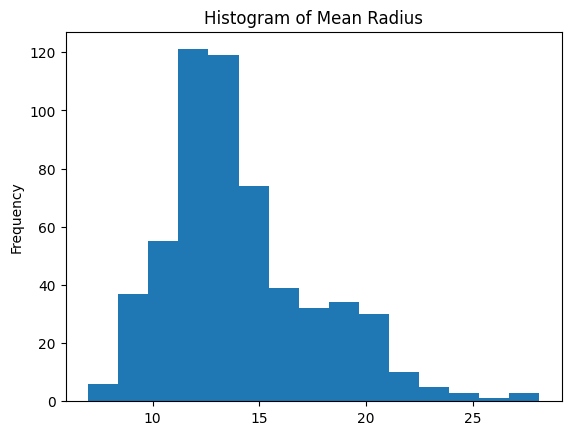

In [11]:
cancer['mean radius'].plot(kind='hist', title="Histogram of Mean Radius", bins=15);

In [13]:
cancer.sort_values("mean radius")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign?
101,6.981,13.43,43.79,143.5,0.11700,...,0.0000,0.00000,0.2932,0.09382,1
539,7.691,25.44,48.34,170.4,0.08668,...,0.3393,0.05000,0.2790,0.10660,1
538,7.729,25.49,47.98,178.8,0.08098,...,0.0000,0.00000,0.3058,0.09938,1
568,7.760,24.54,47.92,181.0,0.05263,...,0.0000,0.00000,0.2871,0.07039,1
46,8.196,16.84,51.71,201.9,0.08600,...,0.0688,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...
82,25.220,24.91,171.50,1878.0,0.10630,...,0.6476,0.28670,0.2355,0.10510,0
352,25.730,17.46,174.20,2010.0,0.11490,...,0.6451,0.27560,0.3690,0.08815,0
180,27.220,21.87,182.10,2250.0,0.10940,...,0.5340,0.26880,0.2856,0.08082,0
461,27.420,26.27,186.90,2501.0,0.10840,...,0.6833,0.26250,0.2641,0.07427,0


In [12]:
df = cancer.sort_values('mean radius')
df.reset_index()

,index,mean radius,mean texture,mean perimeter,mean area,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign?
0,101,6.981,13.43,43.79,143.5,...,0.0000,0.00000,0.2932,0.09382,1
1,539,7.691,25.44,48.34,170.4,...,0.3393,0.05000,0.2790,0.10660,1
2,538,7.729,25.49,47.98,178.8,...,0.0000,0.00000,0.3058,0.09938,1
3,568,7.760,24.54,47.92,181.0,...,0.0000,0.00000,0.2871,0.07039,1
4,46,8.196,16.84,51.71,201.9,...,0.0688,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...
564,82,25.220,24.91,171.50,1878.0,...,0.6476,0.28670,0.2355,0.10510,0
565,352,25.730,17.46,174.20,2010.0,...,0.6451,0.27560,0.3690,0.08815,0
566,180,27.220,21.87,182.10,2250.0,...,0.5340,0.26880,0.2856,0.08082,0
567,461,27.420,26.27,186.90,2501.0,...,0.6833,0.26250,0.2641,0.07427,0


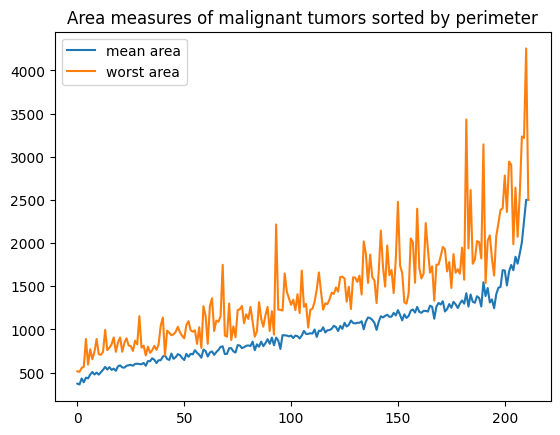

In [14]:
# Using the Pandas "fluent style" to chain operations
(cancer
     .loc[cancer['benign?'] == 0]
     .sort_values('mean perimeter')
     .reset_index()
     [['mean area', 'worst area']]
 .plot(title='Area measures of malignant tumors sorted by perimeter')
);

# Exercises

Let us perform some more analysis of the same Wisconsin cancer dataset we have used for demonstration.

Create graphs similar to those shown above.  But rather than compare visually mean and worst area, according to perimeter, make the same comparison for radii.  Moreover, visualize the data separately for benign versus malignant tumors, and characterize the differences in the patterns you see in your own words.

In [ ]:
# Load the data
cancer = ...

# Visualize patterns
...

# Describe the pattern
pattern = """
It appears that ...
"""

---

Of those observations that have a larger than median value of "mean radius", what is the mean and standard deviation of their "concavity error"? 

Answers: 
* mean=0.036131897
* stddev=0.02302538

In [ ]:
# Mean/standard deviation of high median mean radius
...

Among the benign tumors, what is the correlation coefficient between "mean symmetry" and "mean fractal dimension" (i.e. Pearson product-moment correlation coefficient). 

Answer: 
* coefficient=0.41905971

In [ ]:
# Correlation coefficient between mean symmetry and mean fractal dimension
...

Which feature in the data shows the highest magnitude variance? 

Answer: worst area

In [ ]:
# Feature with highest variance
...

Ignoring the target, which feature shows the highest normalized standard deviation? I.e. standard deviation as a percentage of the entire value range of that feature.

Answer: worst concave points

In [ ]:
# Highest normalized standard deviation
...